In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as ts
import os
os.chdir("D:/Term-2/MachineLearning/Ass-1/Sign_Language_Digit")

In [17]:
x=np.load('X.npy')
y=np.load('Y.npy')

In [18]:
x.shape,y.shape

((2062, 64, 64), (2062, 10))

In [19]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
x_new = []
for matrix in x:
    x_new.append(matrix.reshape(1,-1))

x_new = np.array(x_new).reshape(2062,4096)       

x_new.shape

(2062, 4096)

In [21]:
y1 = []
for i in range(len(y)):
    index =0
    for value in y[i]:
        if value != 1:
            index = index+1
        else:
             y1.append(index+1)
                
y1 = np.array(y1).reshape(-1,1) 
y1

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [10],
       [10],
       [10]])

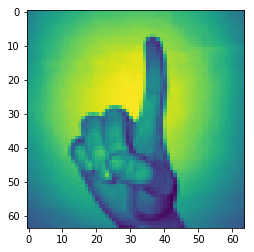

In [22]:
plt.imshow(x[1000])

In [23]:
x = pd.DataFrame(x_new)
y= pd.DataFrame(y1)

In [24]:
x_train,x_test,y_train,y_test = ts(x,y,test_size = 0.2 ,random_state=42)

# Classfications

In [25]:
lr =LogisticRegression()
dt =DecisionTreeClassifier()
mt = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=20)
ab = AdaBoostClassifier()
rf = RandomForestClassifier(n_estimators=301)

In [26]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
mt.fit(x_train,y_train)
knn.fit(x_train,y_train)
ab.fit(x_train,y_train)
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=301, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
lrs =lr.score(x_test,y_test)
dts = dt.score(x_test,y_test)
mts =mt.score(x_test,y_test)
knns=knn.score(x_test,y_test)
abss = ab.score(x_test,y_test)
rfs=rf.score(x_test,y_test)

In [13]:
lrs,dts,mts,knns,abss,rfs

(0.7360774818401937,
 0.5569007263922519,
 0.6004842615012107,
 0.6949152542372882,
 0.38498789346246975,
 0.8038740920096852)

In [14]:
classification=pd.DataFrame(['Logistic Regression','Decision Tree','MutinomialBayes','KNearestNeigbhors','adaboost','RandomForest'],[lrs,dts,mts,knns,abss,rfs])
classification

,0
0.736077,Logistic Regression
0.556901,Decision Tree
0.600484,MutinomialBayes
0.694915,KNearestNeigbhors
0.384988,adaboost
0.803874,RandomForest


# ROC 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


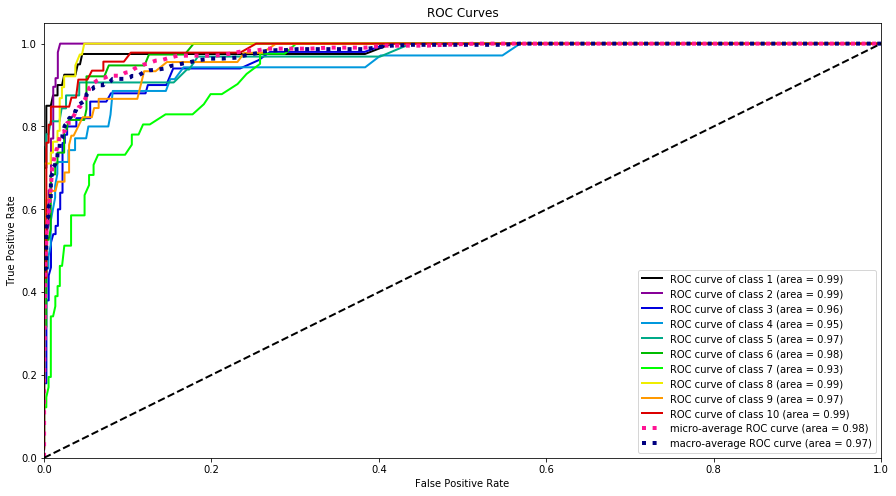

In [15]:
plt.rcParams['figure.figsize'] = [15,8]
plot_roc_curve(y_test,rf.predict_proba(x_test))

# Cross Validation 

In [16]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(n_splits=5, shuffle=True)

scores = cross_val_score(rf,x,y,cv=kf,scoring='accuracy')
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

array([0.82808717, 0.77723971, 0.82038835, 0.75242718, 0.77184466])

# Hyper parametre tunning

In [8]:
rff = RandomForestClassifier()

grid_cv_rf = GridSearchCV(rff,param_grid={'n_estimators' :[x for x in [101,201,301]]},cv =5)

In [15]:
grid_cv_rf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [101, 201, 301]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
grid_cv_rf.best_params_

{'n_estimators': 201}

# 5.	Test the model with your own sign image captured with your mobile cam 

In [57]:
sample = plt.imread('phani_symbol.jpeg')
sample.shape

(436, 547, 3)

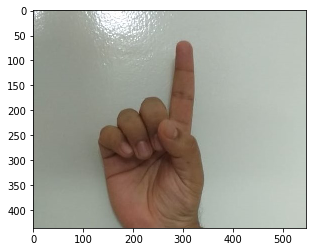

In [32]:
plt.imshow(sample)

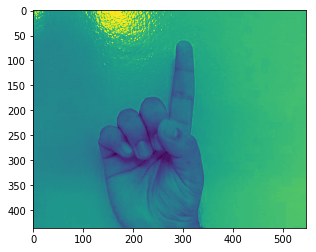

In [33]:
sample=sample[:,:,0]
plt.imshow(sample)

In [75]:

from PIL import Image

size = 64,64
try:
    im = Image.open('phani_symbol.jpeg')
    im.thumbnail(size, Image.ANTIALIAS)
    im.save('phani_symbol1.jpeg', "JPEG")
except IOError:
    print ("cannot create thumbnail")

In [77]:
sample2 = plt.imread('phani_symbol1.jpeg')
sample2.shape

(64, 64, 3)

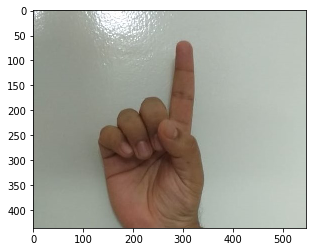

In [78]:
sample2=sample2[:,:,0]
plt.imshow(sample)

In [82]:
rf.predict(sample2.reshape(1,-1))

array([2])

# Extract and display all the wrongly classified 8’s

In [93]:
y_pred=rf.predict(x_test)
y_pred= y_pred.reshape(-1,1)


In [96]:
df = pd.DataFrame(np.concatenate([y_test.values,y_pred],axis=1),columns=['Y_actual','Y_Pred'],index = y_test.index)
df.head()

,Y_actual,Y_Pred
1303,7,4
2027,10,10
693,4,4
1914,10,10
29,1,1


In [98]:
df[(df['Y_actual'] == 8) & (df['Y_actual'] != df['Y_Pred'])].head(3) 

,Y_actual,Y_Pred
1594,8,9
1498,8,10
1569,8,9
